In [83]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('CSV/kidney_disease.csv')

In [85]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [86]:
len(df.columns)

26

In [87]:
# df.dtypes

In [88]:
# df.isnull().sum()

In [89]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')

In [90]:
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [158]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [92]:
# for col in df:
#     cat_col df[col].dtype=='object'

In [93]:
cat_col= [features for features in df.columns if df[features].dtype=='object']
num_col= [features for features in df.columns if df[features].dtype!='object']

In [94]:
for col in cat_col:
     print(f"Feature '{col}' has {df[col].nunique()} unique values: {df[col].unique()}")

Feature 'rbc' has 2 unique values: [nan 'normal' 'abnormal']
Feature 'pc' has 2 unique values: ['normal' 'abnormal' nan]
Feature 'pcc' has 2 unique values: ['notpresent' 'present' nan]
Feature 'ba' has 2 unique values: ['notpresent' 'present' nan]
Feature 'htn' has 2 unique values: ['yes' 'no' nan]
Feature 'dm' has 5 unique values: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Feature 'cad' has 3 unique values: ['no' 'yes' '\tno' nan]
Feature 'appet' has 2 unique values: ['good' 'poor' nan]
Feature 'pe' has 2 unique values: ['no' 'yes' nan]
Feature 'ane' has 2 unique values: ['no' 'yes' nan]
Feature 'classification' has 3 unique values: ['ckd' 'ckd\t' 'notckd']


In [95]:
columns=['dm', 'cad','classification']
for col in columns:
    df[col].replace(to_replace={' yes':'yes','\tno':'no','\tyes':'yes','ckd\t':'ckd'},inplace=True)

C:\Users\Anshil\AppData\Local\Temp\ipykernel_15544\224129567.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(to_replace={' yes':'yes','\tno':'no','\tyes':'yes','ckd\t':'ckd'},inplace=True)


In [96]:
df['rbc'].value_counts()

rbc
normal      201
abnormal     47
Name: count, dtype: int64

In [97]:
for col in cat_col:
     print(f"Feature '{col}' has {df[col].nunique()} unique values: {df[col].unique()}")

Feature 'rbc' has 2 unique values: [nan 'normal' 'abnormal']
Feature 'pc' has 2 unique values: ['normal' 'abnormal' nan]
Feature 'pcc' has 2 unique values: ['notpresent' 'present' nan]
Feature 'ba' has 2 unique values: ['notpresent' 'present' nan]
Feature 'htn' has 2 unique values: ['yes' 'no' nan]
Feature 'dm' has 2 unique values: ['yes' 'no' nan]
Feature 'cad' has 2 unique values: ['no' 'yes' nan]
Feature 'appet' has 2 unique values: ['good' 'poor' nan]
Feature 'pe' has 2 unique values: ['no' 'yes' nan]
Feature 'ane' has 2 unique values: ['no' 'yes' nan]
Feature 'classification' has 2 unique values: ['ckd' 'notckd']


In [98]:
from sklearn.preprocessing import LabelEncoder 

In [119]:
for col in cat_col:
    # encoder = LabelEncoder()
    df[col] = df[col].fillna(df[col].mode()[0])
    # df[col] = encoder.fit_transform(df[col])

In [120]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

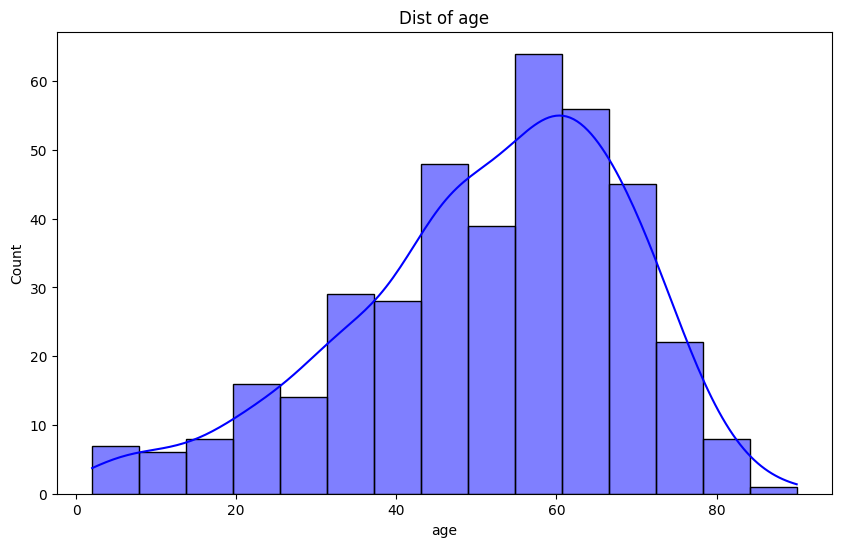

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], color='blue', kde=True)
plt.title('Dist of age')
plt.show()

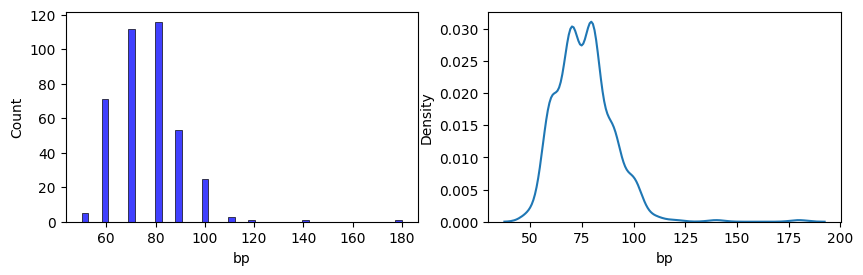

In [122]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['bp'], color='blue')


plt.subplot(2, 2, 2)
sns.kdeplot(df['bp'])
plt.title('')
plt.show()

In [123]:
# there are upto 120 have 80 bp 

In [127]:
df['htn']

0      yes
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: htn, Length: 400, dtype: object

C:\Users\Anshil\AppData\Local\Temp\ipykernel_15544\1510294496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['htn'], palette='Set2')


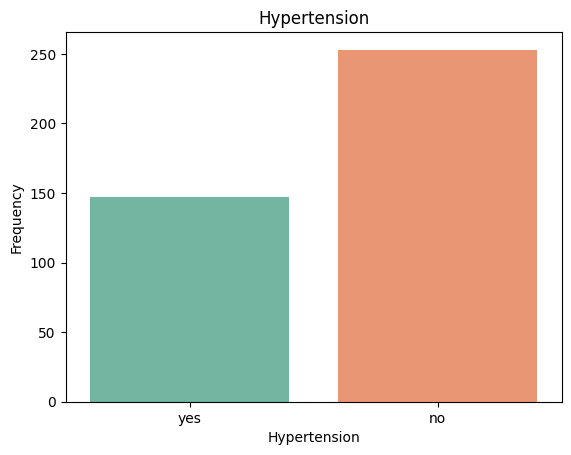

In [142]:
sns.countplot(x=df['htn'], palette='Set2')
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.title('Hypertension')
plt.show()

In [106]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [107]:
# Determine the age of the person who is suffering from high blood pressure

In [108]:
df.groupby('bp')['age'].count().sort_values(ascending=False)

bp
80.0     115
70.0     107
60.0      70
90.0      52
100.0     24
50.0       5
110.0      3
120.0      1
140.0      1
180.0      1
Name: age, dtype: int64

In [153]:
# there are 1 person suffering from high blood pressur

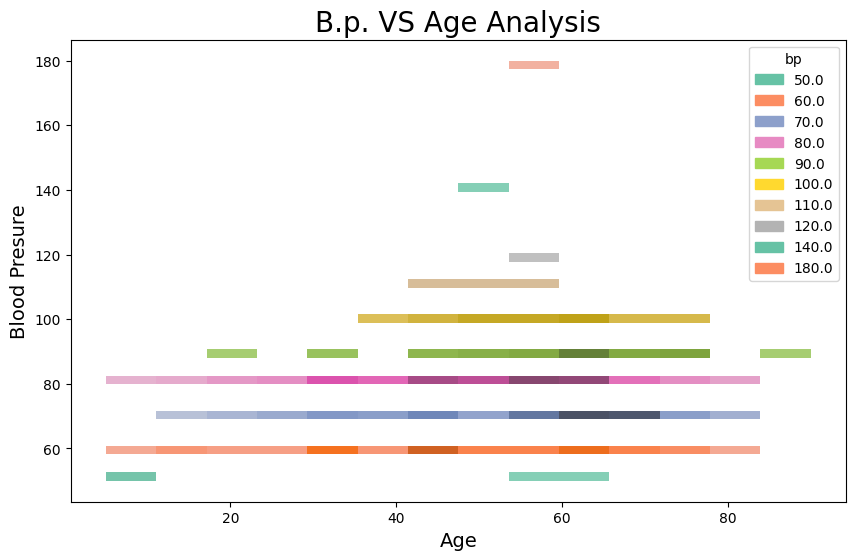

In [154]:
# graphical presentaion of blood pressur vs age relation
plt.figure(figsize=(10, 6))
sns.histplot(x='age', y='bp', data=df, hue='bp', palette='Set2')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Blood Presure', fontsize=14)
plt.title('B.p. VS Age Analysis', fontsize=20)
plt.show()

In [111]:
# blood pressur problem are causing upto 60 years old person

In [112]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

C:\Users\Anshil\AppData\Local\Temp\ipykernel_15544\3969942104.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['ane'], palette='cool')


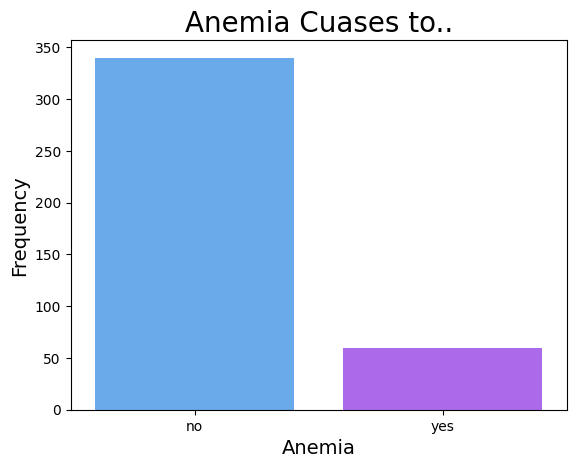

In [155]:
sns.countplot(x=df['ane'], palette='cool')
plt.xlabel('Anemia', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Anemia Cuases to..', fontsize=20)
plt.show()

In [156]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

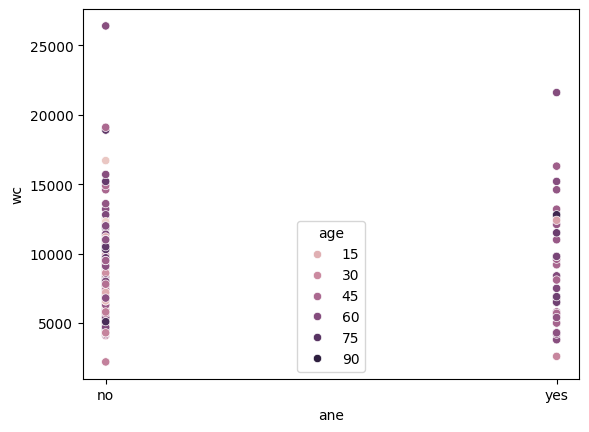

In [176]:
sns.scatterplot(y='wc', x='ane', hue='age',data=df)
plt.show()

In [177]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

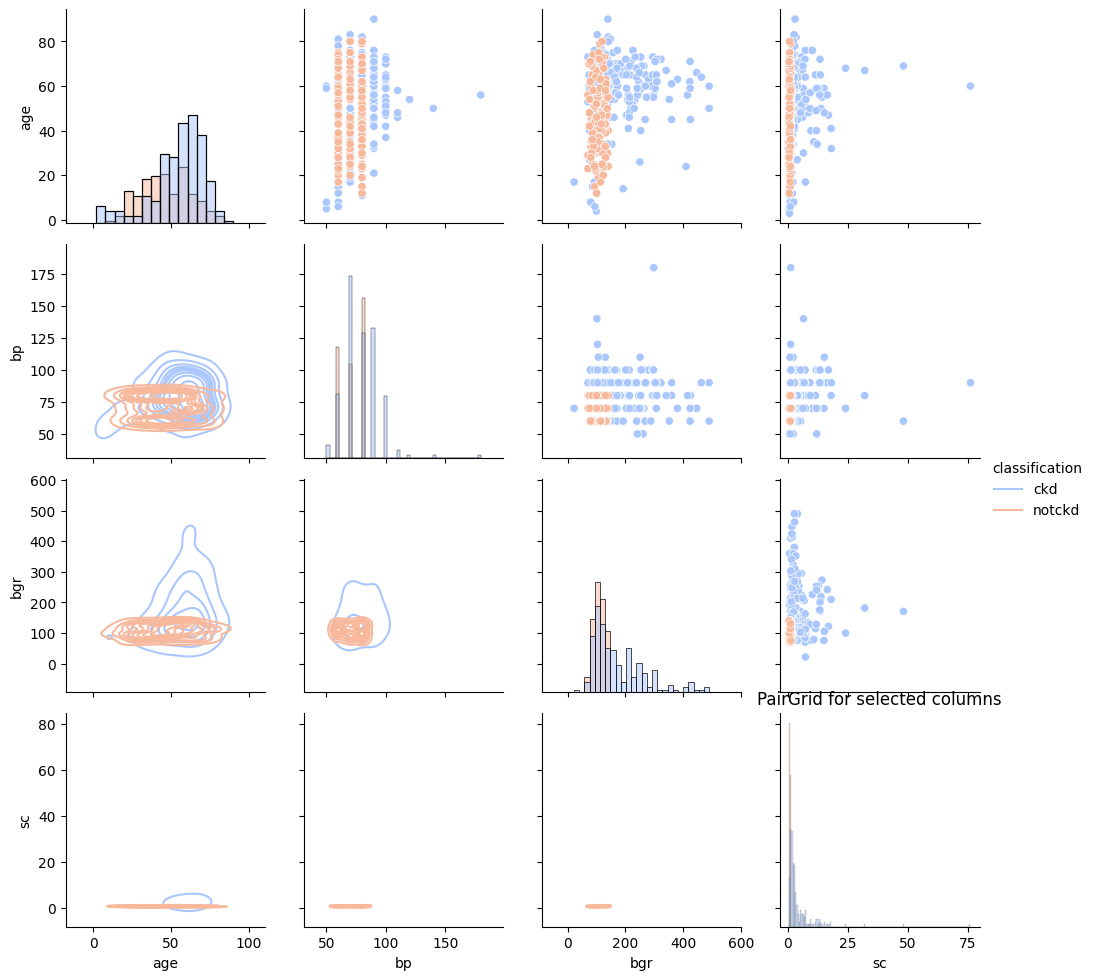

In [185]:
cols = ['age', 'bp', 'bgr', 'sc', 'classification']
g = sns.PairGrid(df[cols], hue='classification', palette='coolwarm')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.title("PairGrid for selected columns")
plt.show()

<Axes: >

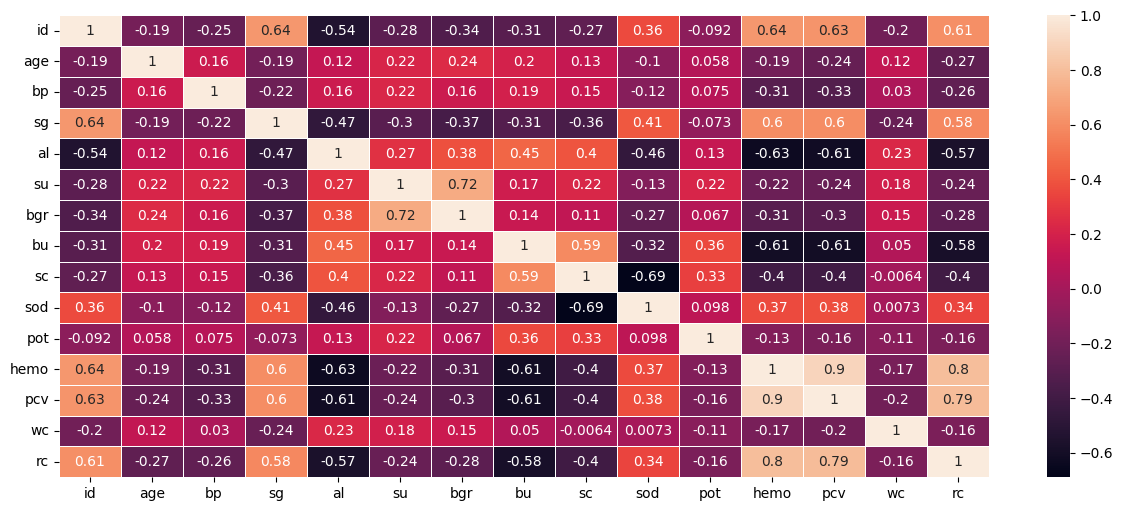

In [191]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, linewidths=.5)

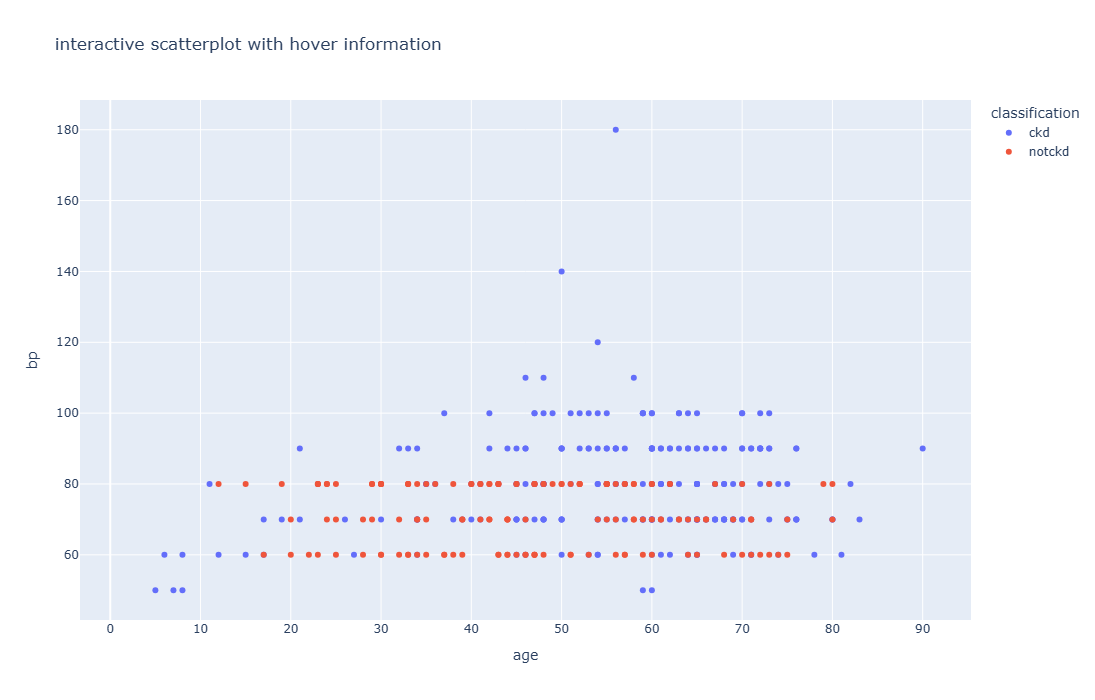

In [209]:
import plotly.express as px

fig = px.scatter(df, x='age', y='bp', color='classification', hover_data=['sc', 'hemo'], title='interactive scatterplot with hover information')
fig.update_layout(
    width=900,   # pixels
    height=700   # pixels
)
fig.show()

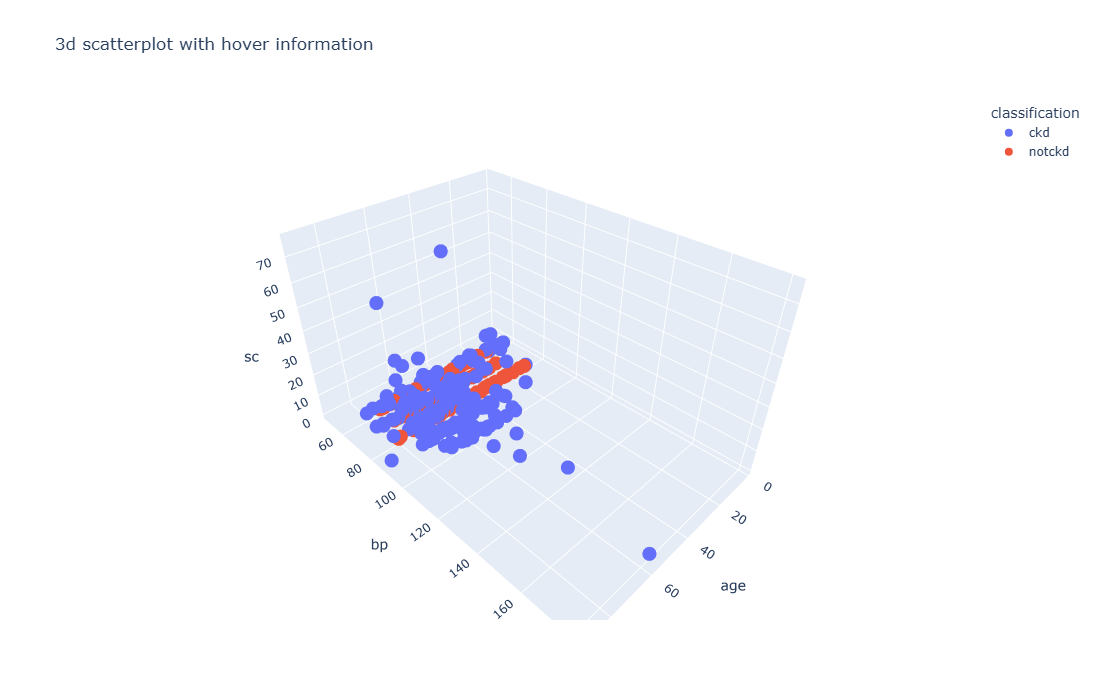

In [208]:

fig = px.scatter_3d(df, x='age', y='bp', z='sc', color='classification', title='3d scatterplot with hover information')
fig.update_layout(
    width=900,   # pixels
    height=700   # pixels
)
fig.show()